## <center>KEMENTRIAN PENDIDIKAN DAN KEBUDAYAAN
## <center>PROGRAM STUDI GEOFISIKA JURUSAN FISIKA
## <center>FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM
# <center>UNIVERSITAS GADJAH MADA
***
## <center>PRAKTIKUM METODE ANALISIS GEOFISIKA 
## <center>ACARA 10. FILTER IIR</center>

# <p>

<img src="http://www.luk.staff.ugm.ac.id/logo/UGM/Resmi/Hitam-putih.gif" width="300" height="300" />
 
# <p>
# <p>
# <p>
### <center>DISUSUN OLEH : 
### <center>TAUFIQURRAHMAN SAGAF KELREY
### <center>19/442442/PA/19191
# <p>   
### <center>ASISTEN : 
### <center>TIM ASISTEN PRAKTIKUM METODE ANALISIS GEOFISIKA 1 2021
***
## <center>YOGYAKARTA
## <center>NOVEMBER
## <center>2021

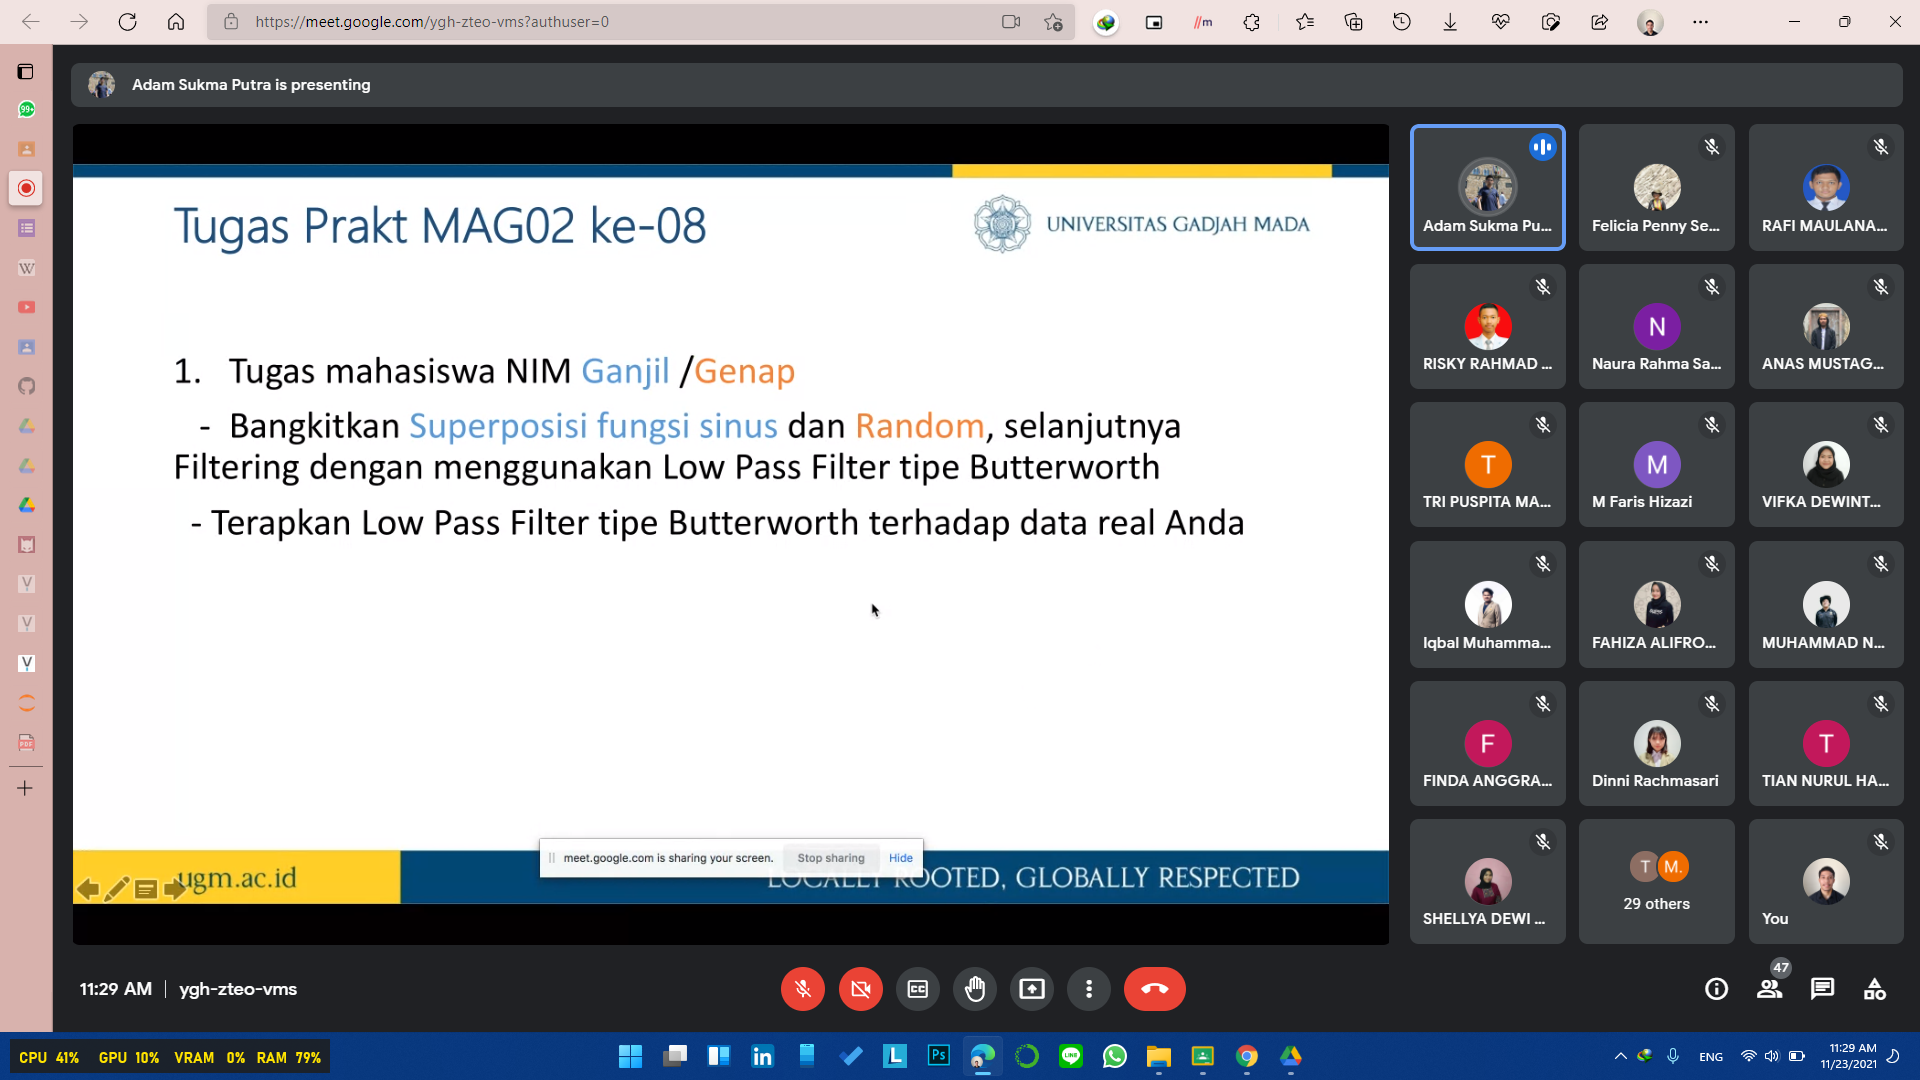

# Sinyal $Random$ dan $Filtering$  LPS tipe $Butterworth$

In [1]:
#import modul
import numpy as np
import soundfile as sf
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, legend, grid, axes, show

In [2]:
#membuat sinyal random

sample_rate  = 100
nsamples     = 2000
t            = arange(nsamples) / sample_rate
dt           = 1.0 / sample_rate #spasi sampling

xa           = np.random.rand(nsamples, 1)
x            = xa-np.median(xa) #normalisasi


In [3]:
#membuat filter FIR dan aplikasi pada x

nyq         = sample_rate / 2.0

#mendefinisikan parameter untuk windowing
lebar       = 4.0 / nyq #mendefinisikan lebar untuk transisi 5Hz
rip_db      = 60.0 #mendefinisikan atenuasi pada band stop

#mendefinisikan parameter Kaiser windowing
N, beta     = kaiserord(rip_db, lebar)

#mendefinisikan cut-off frequency
cut         = 25.0

#menghitung koeefisien dari filter FIR
taps        = firwin(N, cut/nyq, window=('kaiser', beta))

#aplikasi filter pada x (output)
filtered_x  = lfilter(taps, 1.0, x)

#beda fase atua delay dari output
delay = 0.5 * (N-1) / sample_rate

#mendefinisikan magnitudo dan frekuensi respon filter
w, h        = freqz(taps, worN=8000)

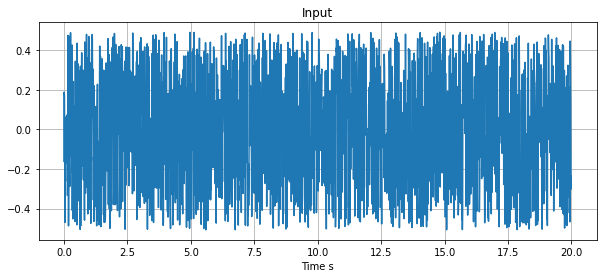

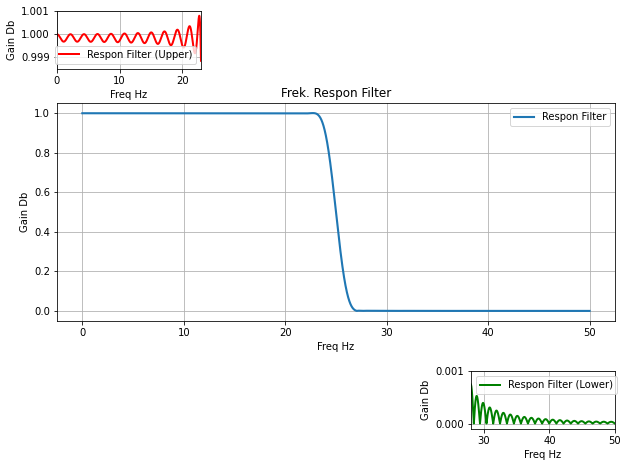

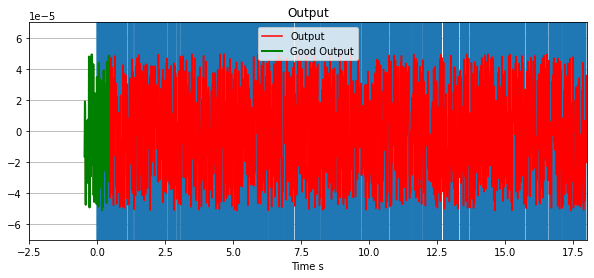

In [4]:
#plot sinyal random

#plot sinyal input
figure(1, figsize=(10,4))
plot(t,x, label="Input")
xlabel("Time s")
title("Input")
grid(True)


#plot magnitudo respon filter FIR
figure(2, figsize=(10,4))
plot(((w/pi)*nyq), (absolute(h)), linewidth=2.1 ,label="Respon Filter")
xlabel("Freq Hz")
ylabel("Gain Db")
ylim(-0.05, 1.05)
title("Frek. Respon Filter")
legend()
grid(True)
# Upper inset plot.
ax1 = axes([0.125, 1, .2, .2])
plot((w/pi)*nyq, absolute(h), 'r',linewidth=2, label="Respon Filter (Upper)")
xlabel("Freq Hz")
ylabel("Gain Db")
xlim(0,23.0)
ylim(0.9985, 1.001)
legend()
grid(True)
# Lower inset plot
ax2 = axes([0.7, -0.25, .2, .2])
plot((w/pi)*nyq, absolute(h), 'g',linewidth=2, label="Respon Filter (Lower)")
xlabel("Freq Hz")
ylabel("Gain Db")
xlim(28, 50)
ylim(-0.0001, 0.001)
legend()
grid(True)


#Plot sinyal terfilter
figure(3, figsize=(10,4))
plot(t,x)
plot(t-delay,filtered_x, 'r-', label="Output")
plot(t[:N-1]-delay,filtered_x[:N-1], 'g', label="Good Output", linewidth=2)
xlabel("Time s")
title("Output")
xlim(-2.5, 18)
ylim(-0.00007, 0.00007)
legend()
grid(True)


show()


In [5]:
#mendefinisikan sinyal real
x, fs       = sf.read('speech.wav')
t           = np.arange(len(x)) / fs
N           = x.size
sample_rate = fs
nsamples    = N
t           = arange(nsamples) / sample_rate

In [6]:
#membuat filter FIR dan aplikasi pada x

nyq         = sample_rate / 2.0

#mendefinisikan parameter untuk windowing
lebar       = 50.0 / nyq #mendefinisikan lebar untuk transisi 5Hz
rip_db      = 40.0 #mendefinisikan atenuasi pada band stop

#mendefinisikan parameter Kaiser windowing
N, beta     = kaiserord(rip_db, lebar)

#mendefinisikan cut-off frequency
cut         = 200.0

#menghitung koeefisien dari filter FIR
taps        = firwin(N, cut/nyq, window=('kaiser', beta))

#aplikasi filter pada x (output)
filtered_x  = lfilter(taps, 1.0, x)

#beda fase atua delay dari output
delay = 0.5 * (N-1) / sample_rate

#mendefinisikan magnitudo dan frekuensi respon filter
w, h        = freqz(taps, worN=8000)

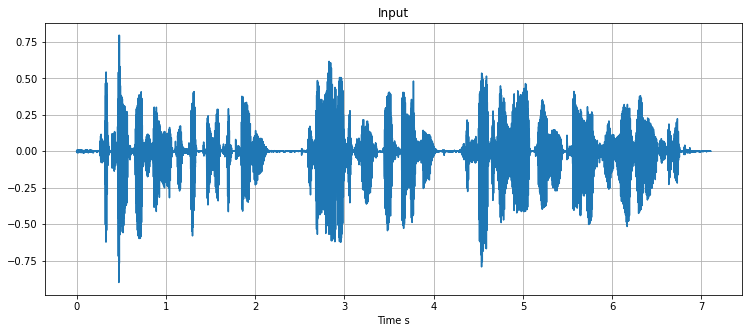

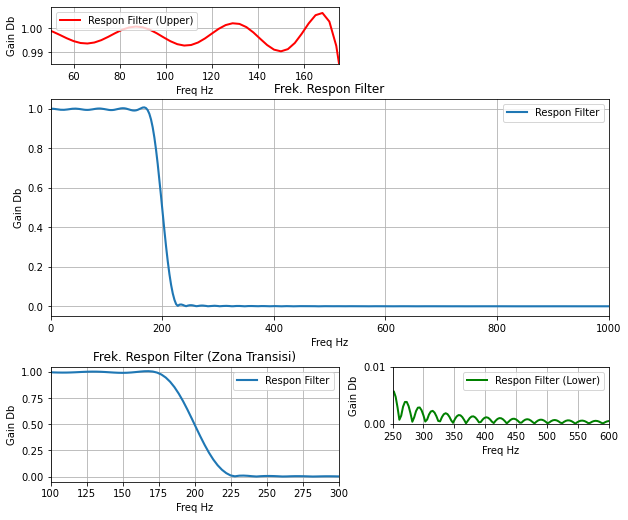

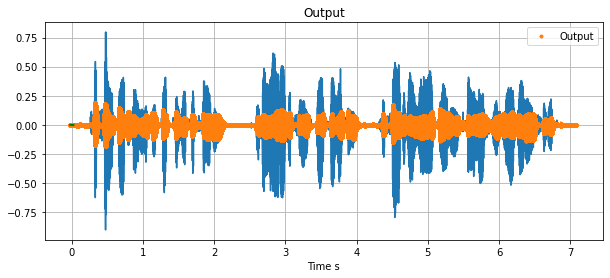

In [9]:
#plot sinyal real

#plot sinyal input
figure(1, figsize=(12.5,5))
plot(t,x, label="Input")
xlabel("Time s")
title("Input")
grid(True)



#plot magnitudo respon filter FIR
figure(2, figsize=(10,4))
plot(((w/pi)*nyq), (absolute(h)), linewidth=2.1 ,label="Respon Filter")
xlabel("Freq Hz")
ylabel("Gain Db")
ylim(-0.05, 1.05)
xlim(0, 1000)
title("Frek. Respon Filter")
legend()
grid(True)
# perebesar pada transisi
ax1 = axes([0.125, -0.45, .4, .4])
plot(((w/pi)*nyq), (absolute(h)), linewidth=2.1 ,label="Respon Filter")
xlabel("Freq Hz")
ylabel("Gain Db")
ylim(-0.05, 1.05)
xlim(100, 300)
title("Frek. Respon Filter (Zona Transisi)")
legend()
grid(True)
# Upper inset plot.
ax2 = axes([0.125, 1, .4, .2])
plot((w/pi)*nyq, absolute(h), 'r',linewidth=2, label="Respon Filter (Upper)")
xlabel("Freq Hz")
ylabel("Gain Db")
xlim(50,175)
ylim(.985, 1.009)
legend()
grid(True)
# Lower inset plot
ax3 = axes([0.6, -0.25, .30, .2])
plot((w/pi)*nyq, absolute(h), 'g',linewidth=2, label="Respon Filter (Lower)")
xlabel("Freq Hz")
ylabel("Gain Db")
xlim(250, 600)
ylim(-0.0001, 0.01)
legend()
grid(True)



#Plot sinyal terfilter
figure(3, figsize=(10,4))
plot(t,x)
plot(t-delay,filtered_x, '.', label="Output")
plot(t[:N-1]-delay,filtered_x[:N-1], 'g', linewidth=2)
xlabel("Time s")
title("Output")
#xlim(-2.5, 18)
#ylim(-0.00007, 0.00007)
legend()
grid(True)


show()